<a href="https://colab.research.google.com/github/anujpatel2122/project_group_5/blob/main/capstonecleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/all_years (2).csv')
print(df.info())  # Gives an overview of the dataset structure
print(df.isnull().sum())  # Shows missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113702 entries, 0 to 113701
Data columns (total 71 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sofifa_id                   113702 non-null  int64  
 1   player_url                  113702 non-null  object 
 2   short_name                  113702 non-null  object 
 3   age                         113702 non-null  int64  
 4   nationality                 113702 non-null  object 
 5   club_name                   113702 non-null  object 
 6   league_name                 113702 non-null  object 
 7   player_positions            113702 non-null  object 
 8   weight_kg                   113702 non-null  object 
 9   foot                        113702 non-null  object 
 10  bov                         113702 non-null  int64  
 11  bp                          113702 non-null  object 
 12  growth                      113702 non-null  int64  
 13  joined        

In [3]:
# we are dropping loan_date_end and mentality_composure as it contains only 343 and 0 out of  113702 entries as it would not effect our analysis
df = df.drop(['loan_date_end', 'mentality_composure'], axis=1)

In [4]:
print(df.columns)
print(df.info())

Index(['sofifa_id', 'player_url', 'short_name', 'age', 'nationality',
       'club_name', 'league_name', 'player_positions', 'weight_kg', 'foot',
       'bov', 'bp', 'growth', 'joined', 'value', 'wage', 'release_clause',
       'attacking', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance', 'power',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending', 'defending_marking',
       'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeepi

In [5]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
# Filtering numerical columns that have missing values
missing_numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
# Printing the numerical columns with missing values
print("Numerical columns with missing values:")
print(df[missing_numerical_columns].isnull().sum())


Numerical columns with missing values:
attacking_volleys           53036
skill_curve                 53036
movement_agility            53036
movement_balance            53036
power_jumping               53036
mentality_interceptions     10768
mentality_positioning       10768
mentality_vision            53036
defending_sliding_tackle    53036
dtype: int64


In [6]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filling the missing values in numerical columns with their median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())



In [7]:
# Filter for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check for remaining missing values in numerical columns
missing_values_numerical = df[numerical_columns].isnull().sum()

# Filter to show only numerical columns with missing values
missing_values_numerical = missing_values_numerical[missing_values_numerical > 0]

print(missing_values_numerical)



Series([], dtype: int64)


In [8]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
remaining_missing_values = missing_values[missing_values > 0]

# Display remaining missing values
print(remaining_missing_values)


joined               53036
work_rate_attack     68176
work_rate_defense    68176
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113702 entries, 0 to 113701
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sofifa_id                   113702 non-null  int64  
 1   player_url                  113702 non-null  object 
 2   short_name                  113702 non-null  object 
 3   age                         113702 non-null  int64  
 4   nationality                 113702 non-null  object 
 5   club_name                   113702 non-null  object 
 6   league_name                 113702 non-null  object 
 7   player_positions            113702 non-null  object 
 8   weight_kg                   113702 non-null  object 
 9   foot                        113702 non-null  object 
 10  bov                         113702 non-null  int64  
 11  bp                          113702 non-null  object 
 12  growth                      113702 non-null  int64  
 13  joined        

In [10]:
# Handling the 'joined' column
df['joined'] = pd.to_datetime(df['joined'], format='%b %d, %Y', errors='coerce')

# Replace missing values in 'joined' with a specific date
df['joined'] = df['joined'].fillna(pd.Timestamp('2000-01-01'))

# Define categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = df[column].fillna('Unknown')

# Check for remaining missing values in categorical columns
print(df[categorical_columns].isnull().sum())


player_url           0
short_name           0
nationality          0
club_name            0
league_name          0
player_positions     0
weight_kg            0
foot                 0
bp                   0
value                0
wage                 0
release_clause       0
work_rate_attack     0
work_rate_defense    0
dtype: int64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113702 entries, 0 to 113701
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   sofifa_id                   113702 non-null  int64         
 1   player_url                  113702 non-null  object        
 2   short_name                  113702 non-null  object        
 3   age                         113702 non-null  int64         
 4   nationality                 113702 non-null  object        
 5   club_name                   113702 non-null  object        
 6   league_name                 113702 non-null  object        
 7   player_positions            113702 non-null  object        
 8   weight_kg                   113702 non-null  object        
 9   foot                        113702 non-null  object        
 10  bov                         113702 non-null  int64         
 11  bp                          113702 non-

In [12]:
print(df['wage'].head(20))  # View the first 20 raw entries


0      €0
1      €0
2      €0
3      €0
4      €0
5     €7K
6     €5K
7      €0
8      €0
9      €0
10     €0
11     €0
12     €0
13     €0
14     €0
15     €0
16     €0
17     €0
18     €0
19    €3K
Name: wage, dtype: object


In [13]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'value' contains the raw data
# Remove the '€' sign and convert 'K' and 'M' to numerical values
def clean_value(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif value == '€0':
            return 0.0
    return float(value)

# Apply the cleaning function directly to the 'value' column
df['value'] = df['value'].apply(clean_value)

# Replace zero values with the median (excluding zeros from the calculation)
median_value = df['value'][df['value'] > 0].median()
df['value'] = df['value'].replace(0, median_value)

# Verify the changes
print("Median used for replacement:", median_value)
print(df['value'].head(20))  # Show first 20 rows of cleaned data


Median used for replacement: 375000.0
0     375000.0
1     375000.0
2     375000.0
3     375000.0
4     375000.0
5     575000.0
6     350000.0
7     375000.0
8     375000.0
9     375000.0
10    375000.0
11    375000.0
12    375000.0
13    375000.0
14    375000.0
15    375000.0
16    375000.0
17    375000.0
18    375000.0
19    325000.0
Name: value, dtype: float64


In [14]:
# Step 1: Remove the '€' symbol and convert 'K' to numeric
df['wage'] = df['wage'].replace({'€': '', 'K': '*1000'}, regex=True)
df['wage'] = df['wage'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Step 2: Handle missing or zero values (e.g., replace 0 with the median)
median_wage = df['wage'].replace(0, pd.NA).median()  # Calculate median without zeros
df['wage'] = df['wage'].replace(0, median_wage)  # Replace 0s with the median wage

# Display the cleaned 'wage' column (first 20 rows for inspection)
print(df['wage'].head(20))


0     3000
1     3000
2     3000
3     3000
4     3000
5     7000
6     5000
7     3000
8     3000
9     3000
10    3000
11    3000
12    3000
13    3000
14    3000
15    3000
16    3000
17    3000
18    3000
19    3000
Name: wage, dtype: int64


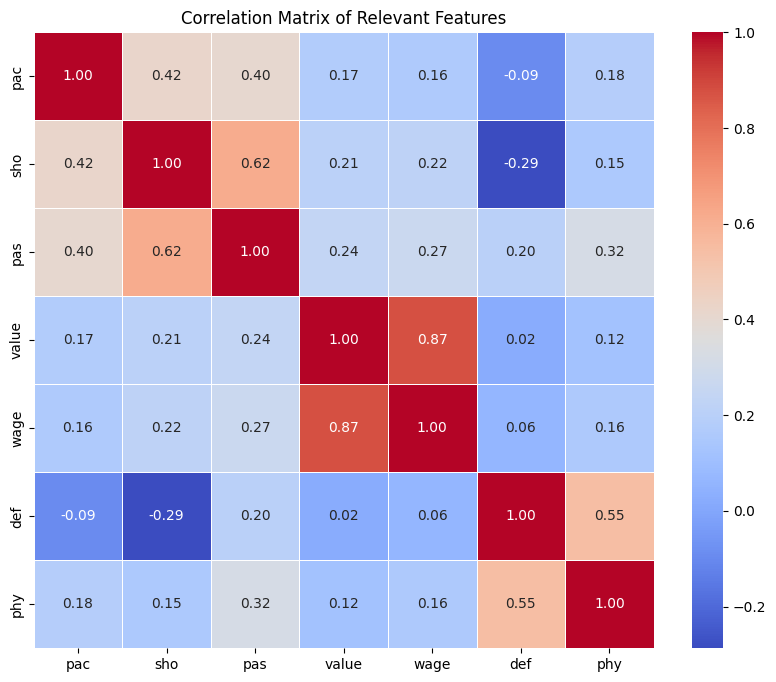

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the relevant columns based on the column names in your dataset
relevant_columns = ['pac', 'sho', 'pas', 'value', 'wage', 'def', 'phy']

# Filter the DataFrame to include only the relevant numerical columns
filtered_df = df[relevant_columns]

# Calculate the correlation matrix, explicitly specifying numeric_only=True
correlation_matrix = filtered_df.corr(numeric_only=True)

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)

# Add title to the plot
plt.title('Correlation Matrix of Relevant Features')

# Show the plot
plt.show()


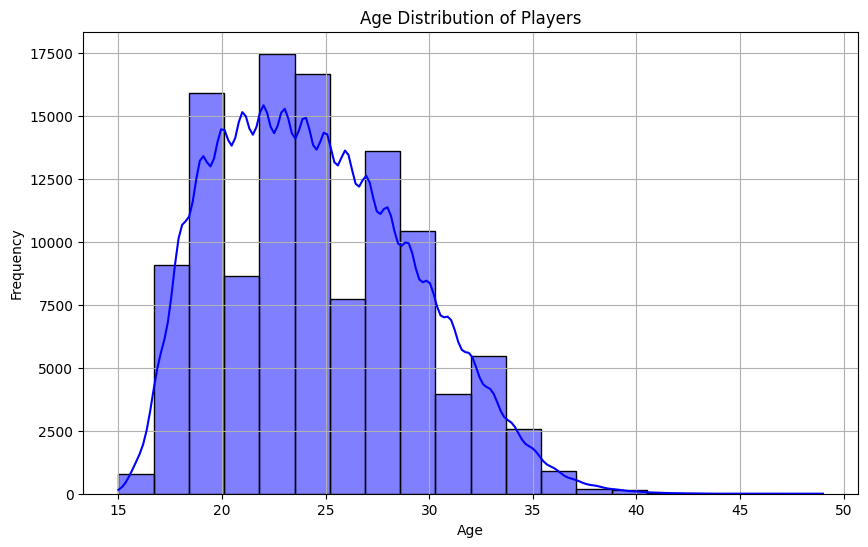

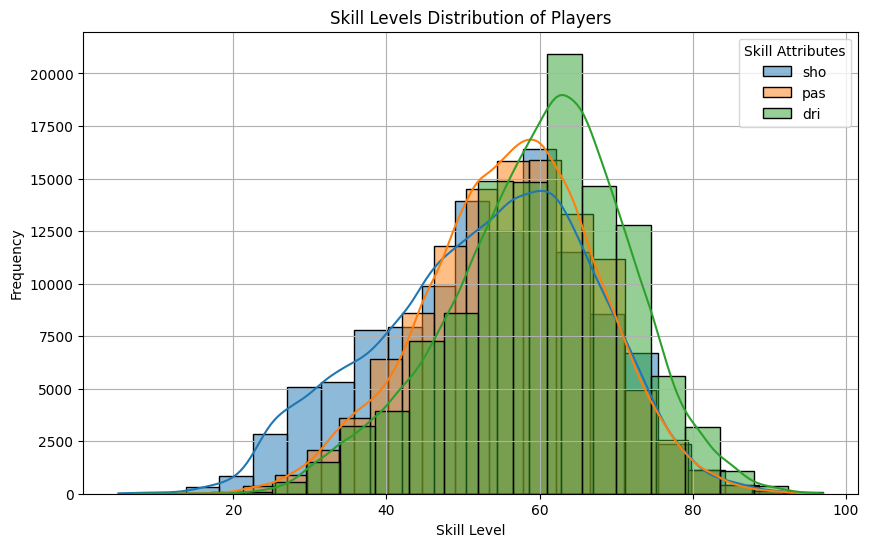

<ipython-input-16-23825a9590e0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')


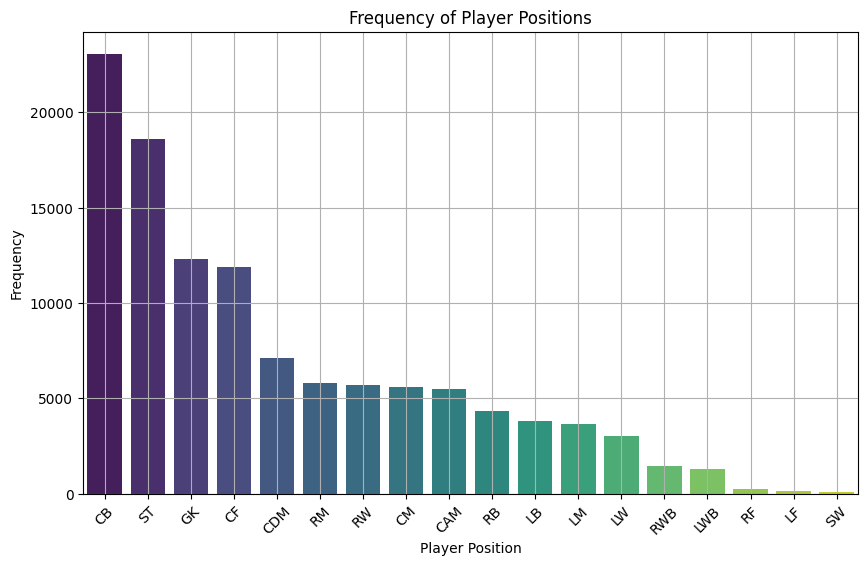

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

skills = ['sho', 'pas', 'dri']  # Using the correct columns from your dataset
plt.figure(figsize=(10,6))

for skill in skills:
    sns.histplot(df[skill], kde=True, label=skill, bins=20)

plt.title('Skill Levels Distribution of Players')
plt.xlabel('Skill Level')
plt.ylabel('Frequency')
plt.legend(title='Skill Attributes')
plt.grid(True)
plt.show()

position_counts = df['player_positions'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.title('Frequency of Player Positions')
plt.xlabel('Player Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Age Distribution:
The age distribution shows a central clustering around the median (marked by the red line). Most players fall within a specific age range, potentially indicating an age peak for optimal performance in this dataset.

Skill Levels Distribution (Shooting, Passing, Dribbling):
The skill distributions reveal slight variations across shooting, passing, and dribbling. If any skill distribution skews higher, it might suggest a focus on that skill in training or selection criteria for these players.

Frequency of Player Positions:
The bar chart highlights certain player positions as more common, which may reflect typical formations or popular tactical roles. Notable peaks for specific positions could indicate a positional preference in team composition.








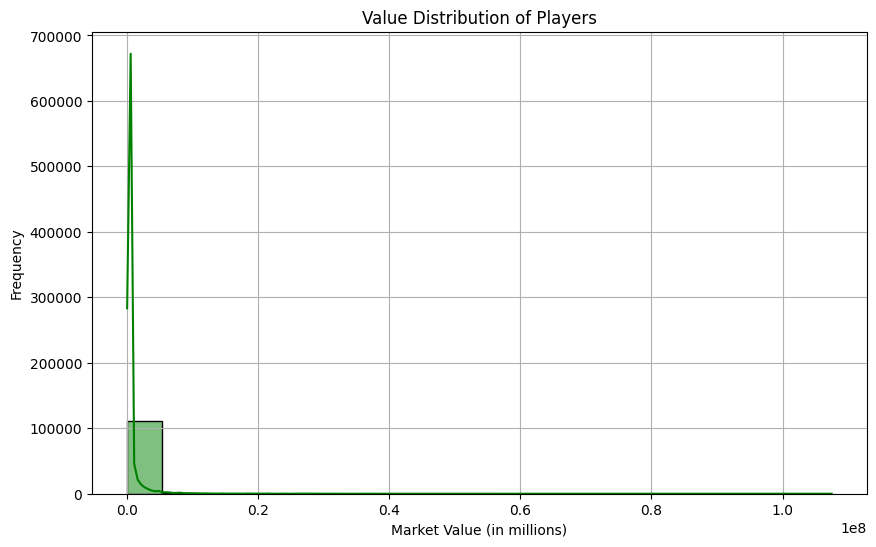

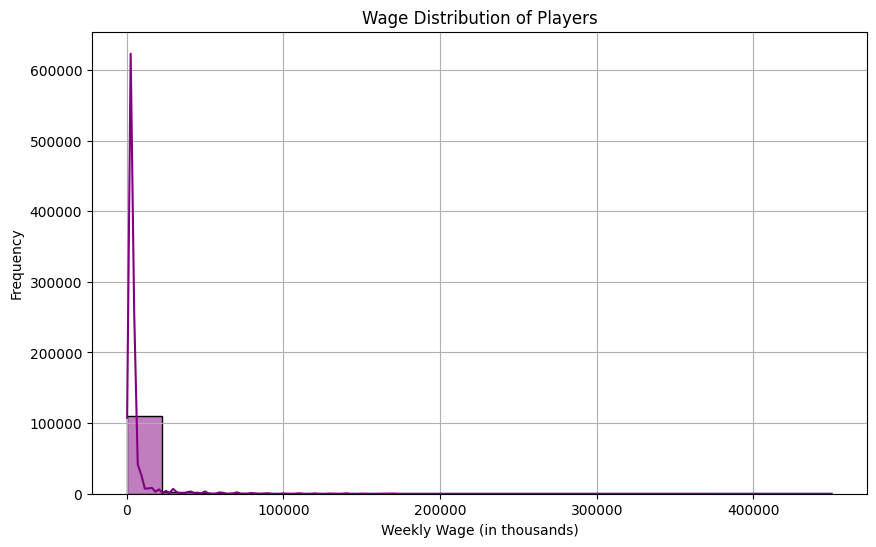

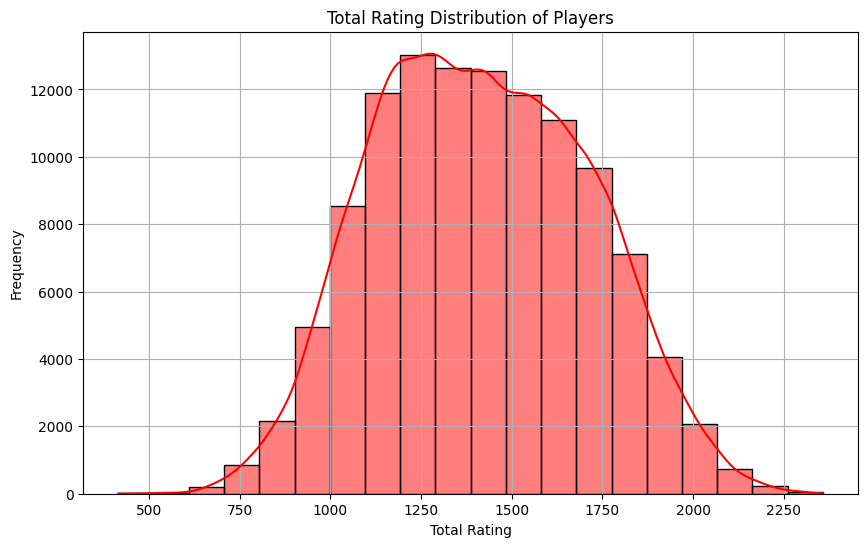

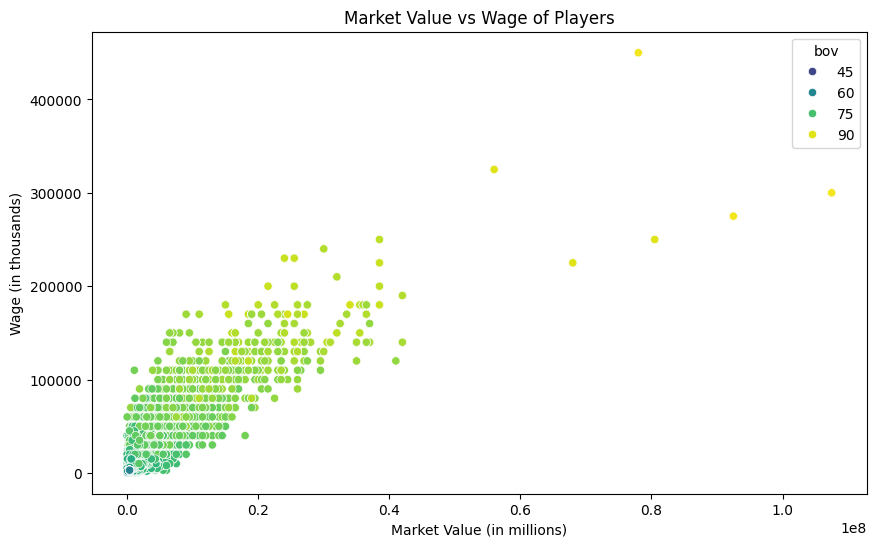

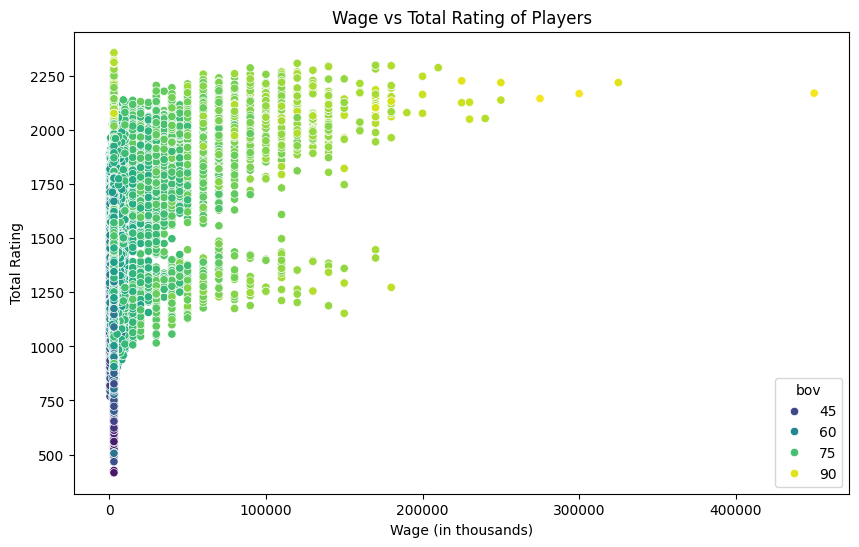

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. **Value Distribution (Histogram)**
plt.figure(figsize=(10, 6))
sns.histplot(df['value'], kde=True, color='green', bins=20)
plt.title('Value Distribution of Players')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. **Wage Distribution (Histogram)**
plt.figure(figsize=(10, 6))
sns.histplot(df['wage'], kde=True, color='purple', bins=20)
plt.title('Wage Distribution of Players')
plt.xlabel('Weekly Wage (in thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 3. **Total Rating Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], kde=True, color='red', bins=20)
plt.title('Total Rating Distribution of Players')
plt.xlabel('Total Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. **Market Value vs Wage (Scatter Plot)**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='value', y='wage', hue='bov', palette='viridis')
plt.title('Market Value vs Wage of Players')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Wage (in thousands)')
plt.show()


# 5. **Wage vs Total Rating (Scatter Plot)**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wage', y='total', hue='bov', palette='viridis')
plt.title('Wage vs Total Rating of Players')
plt.xlabel('Wage (in thousands)')
plt.ylabel('Total Rating')
plt.show()



Value Distribution: Most players have moderate market values, with a small number of high-value players likely representing top-tier talent.

Wage Distribution: Wages show a similar pattern, with a concentration around average pay and a few highly-paid outliers, likely star players.

Total Rating Distribution: Player ratings are mainly in the average-to-high range, suggesting balanced talent distribution, with fewer elite-rated players.

Market Value vs. Wage: Higher market values tend to align with higher wages, but there are some outliers where market value doesn’t match wage, indicating potential under- or over-valuations.

Market Value vs. Total Rating: Higher-rated players generally have higher market values, though some highly rated players may be undervalued.

Wage vs. Total Rating: A positive trend suggests wages rise with ratings, though some high-rated players earn less than expected.

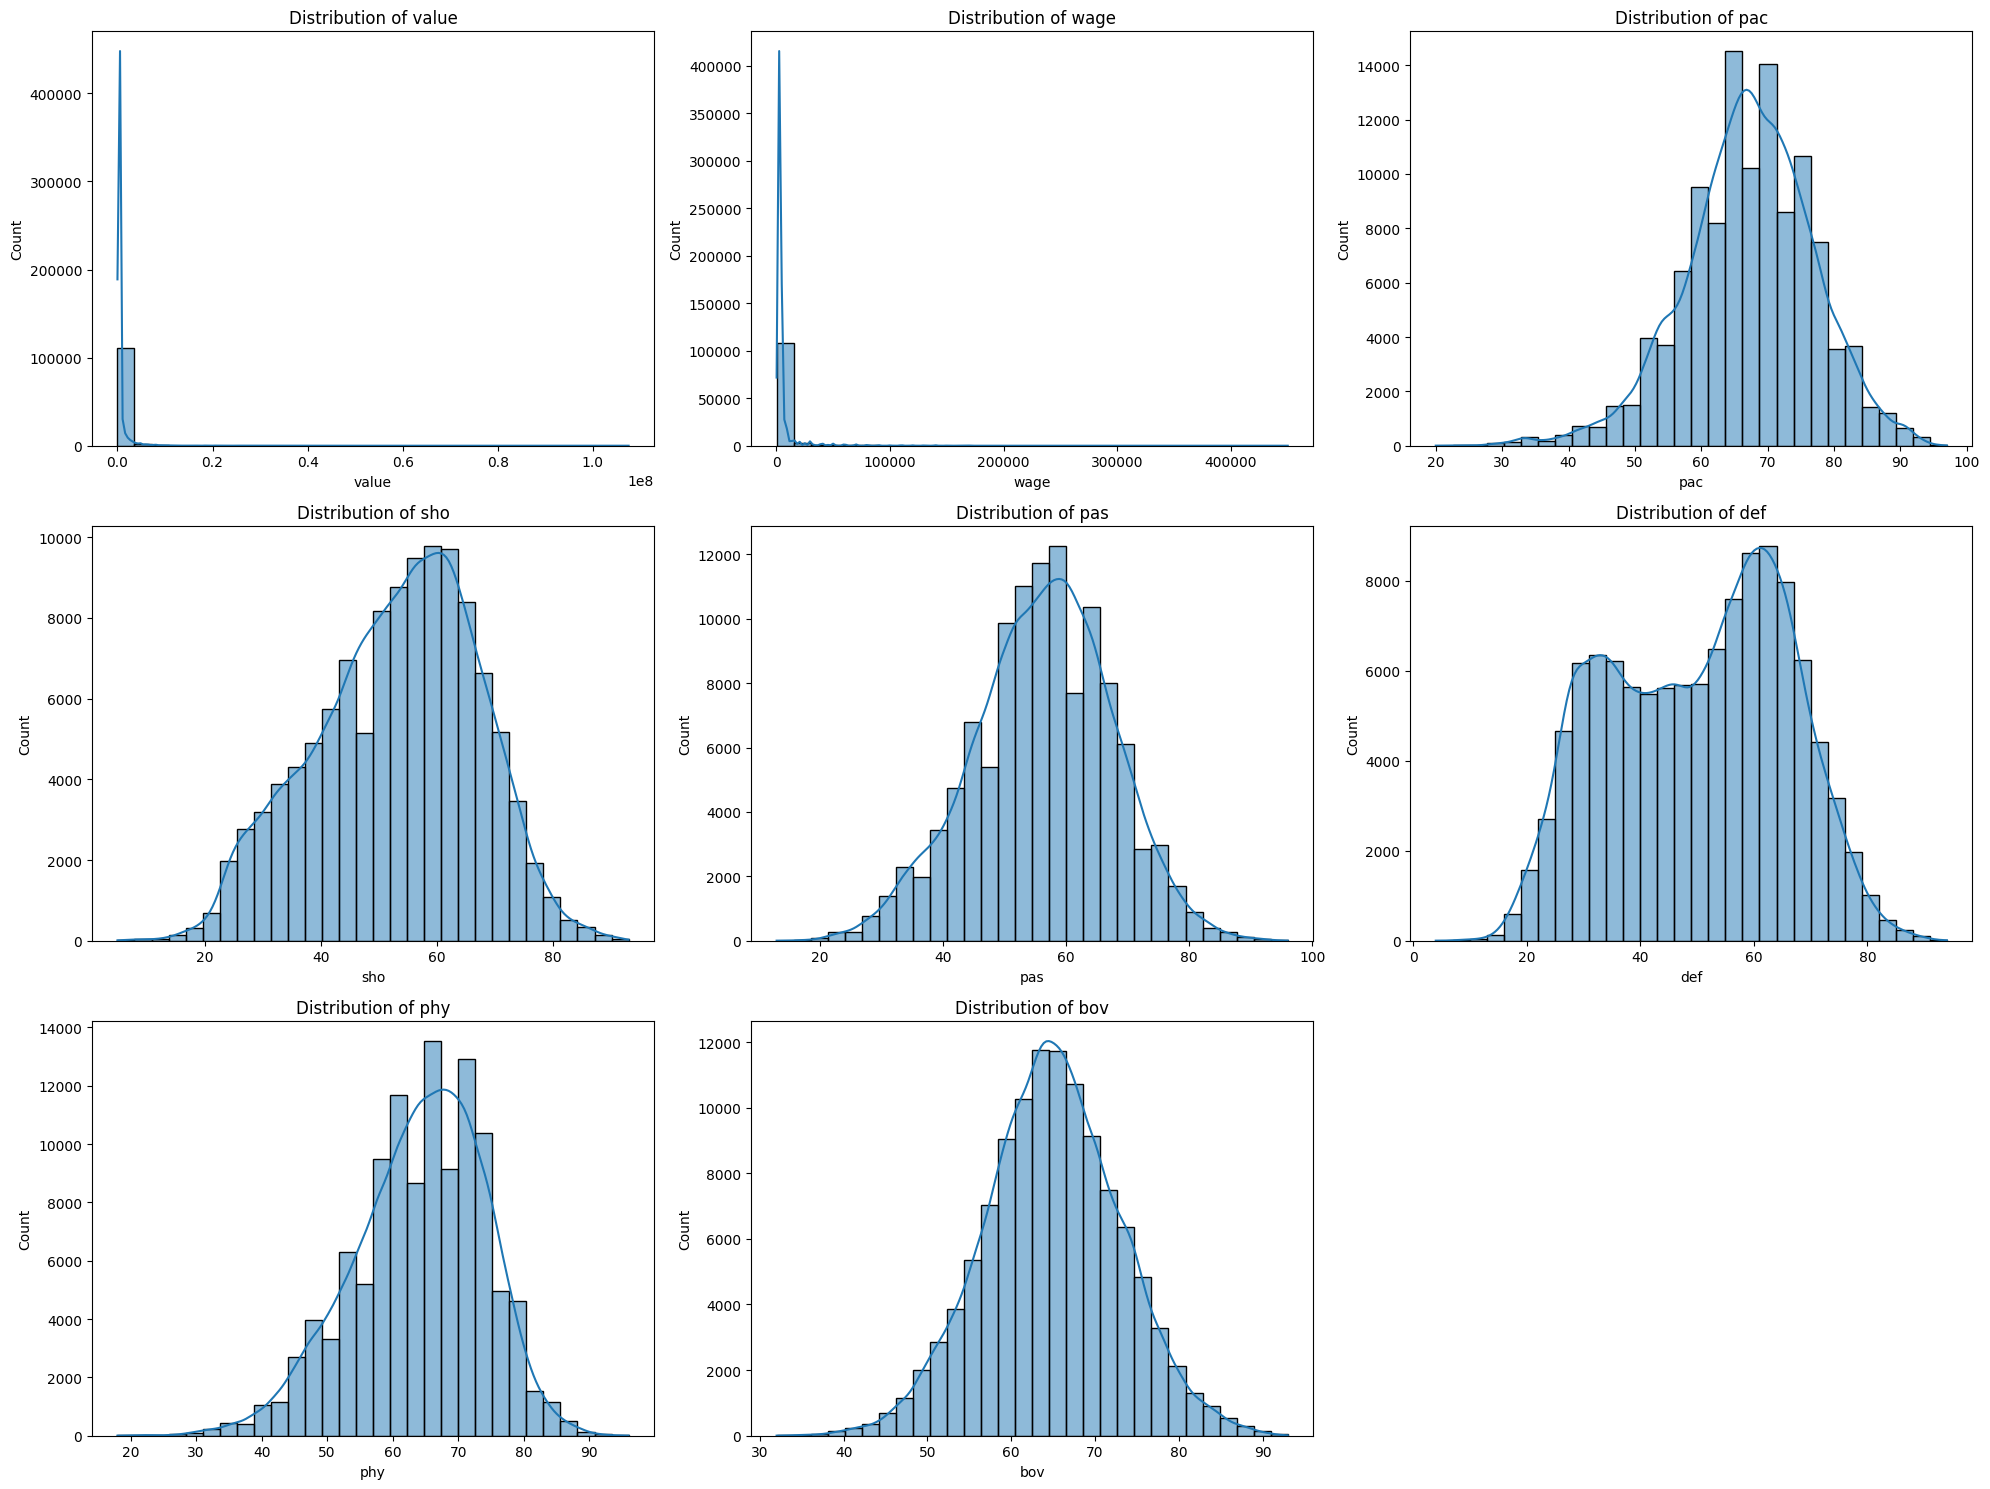

              value           wage            pac            sho  \
count  1.137020e+05  113702.000000  113702.000000  113702.000000   
mean   6.852739e+05    5483.687622      67.143735      53.117087   
std    1.915802e+06   12430.279191       9.799519      13.870495   
min    1.000000e+03     250.000000      20.000000       5.000000   
25%    3.750000e+05    3000.000000      61.000000      44.000000   
50%    3.750000e+05    3000.000000      67.000000      54.000000   
75%    3.750000e+05    3000.000000      74.000000      63.000000   
max    1.075000e+08  450000.000000      97.000000      93.000000   

                 pas            def            phy           bov  
count  113702.000000  113702.000000  113702.000000  113702.00000  
mean       56.187886      49.997678      64.021125      64.87739  
std        11.359916      15.655776      10.040234       8.14781  
min        13.000000       4.000000      18.000000      32.00000  
25%        49.000000      36.000000      58.000000  

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of the attributes to analyze
attributes = ['value', 'wage', 'pac', 'sho', 'pas', 'def', 'phy', 'bov']

# Set the plot size for better visibility
plt.figure(figsize=(20, 15))

# Loop through each attribute for univariate analysis
for i, column in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    # Plot histogram, boxplot and KDE for each attribute
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Calculate summary statistics for each attribute
summary_stats = df[attributes].describe()
print(summary_stats)


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your dataframe

# 1. Log Transformation for Skewed Features (e.g., 'value', 'wage')
# Add a small constant (+1) to handle zero values
df['value'] = np.log(df['value'] + 1)
df['wage'] = np.log(df['wage'] + 1)

# You can also apply log transformation to other skewed features, if needed
# df['other_skewed_feature'] = np.log(df['other_skewed_feature'] + 1)

# 2. Normalization (Min-Max Scaling) for all features
# Initialize the MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()

# Select numerical columns that need to be normalized
numerical_cols = ['value', 'wage', 'pac', 'sho', 'pas', 'def', 'phy', 'bov']

# Fit and transform the scaler on the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the results after transformation
print(df[numerical_cols].head())


      value      wage       pac       sho       pas       def       phy  \
0  0.511551  0.331206  0.649351  0.727273  0.734940  0.611111  0.628205   
1  0.511551  0.331206  0.701299  0.704545  0.626506  0.611111  0.628205   
2  0.511551  0.331206  0.714286  0.738636  0.674699  0.611111  0.679487   
3  0.511551  0.331206  0.714286  0.704545  0.626506  0.633333  0.679487   
4  0.511551  0.331206  0.675325  0.681818  0.626506  0.622222  0.730769   

        bov  
0  0.622951  
1  0.639344  
2  0.688525  
3  0.672131  
4  0.655738  


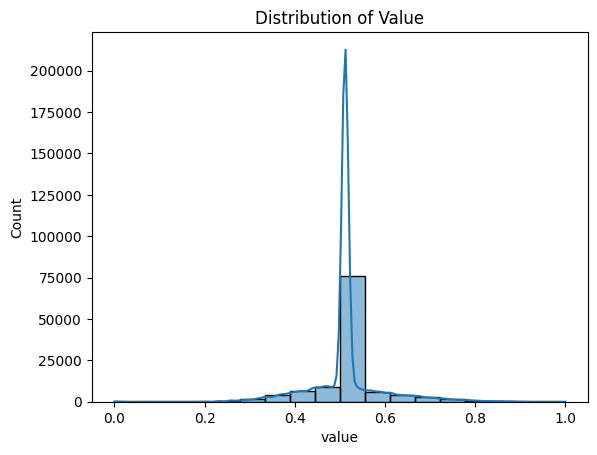

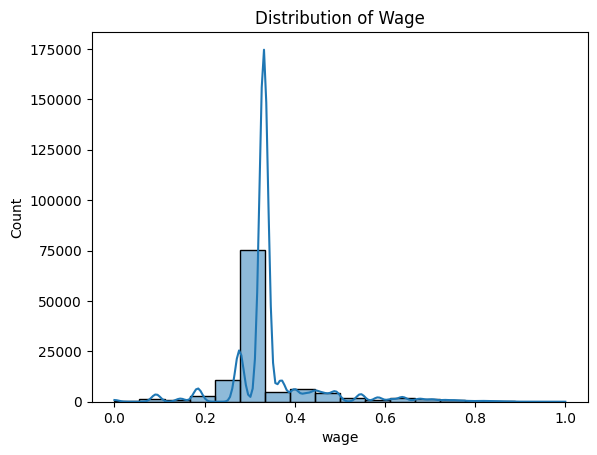

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'value' and 'wage'
sns.histplot(df['value'], kde=True)
plt.title('Distribution of Value')
plt.show()

sns.histplot(df['wage'], kde=True)
plt.title('Distribution of Wage')
plt.show()


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113702 entries, 0 to 113701
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   sofifa_id                   113702 non-null  int64         
 1   player_url                  113702 non-null  object        
 2   short_name                  113702 non-null  object        
 3   age                         113702 non-null  int64         
 4   nationality                 113702 non-null  object        
 5   club_name                   113702 non-null  object        
 6   league_name                 113702 non-null  object        
 7   player_positions            113702 non-null  object        
 8   weight_kg                   113702 non-null  object        
 9   foot                        113702 non-null  object        
 10  bov                         113702 non-null  float64       
 11  bp                          113702 non-

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



# Step 1: Remove Irrelevant Columns
drop_columns = ["sofifa_id", "player_url", "joined"]
df.drop(columns=drop_columns, inplace=True)

# Step 2: Encode Categorical Features
label_enc_cols = ["nationality", "club_name", "league_name", "player_positions"]
one_hot_cols = ["foot", "work_rate_attack", "work_rate_defense"]

# Apply Label Encoding
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Step 3: Create New Features
df["value_wage_ratio"] = df["value"] / (df["wage"] + 1)  # Avoid division by zero
df["skill_pace_ratio"] = df["dri"] / (df["pac"] + 1)
df["defensive_strength"] = df["def"] + df["phy"]
df["attacking_strength"] = df["sho"] + df["pac"]

# Step 4: Feature Scaling
scaler = MinMaxScaler()
numeric_cols = ["value", "wage", "pac", "sho", "dri", "def", "phy", "value_wage_ratio", "skill_pace_ratio", "defensive_strength", "attacking_strength"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save processed dataset
df.to_csv("processed_dataset.csv", index=False)
print("Feature engineering complete. Processed dataset saved.")


Feature engineering complete. Processed dataset saved.
